<a href="https://colab.research.google.com/github/Manu-Sanchez/Learning/blob/ai%2Fbasic-gan/ANN_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding**

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Data Plotting

In [4]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


[0.0, 1.0, 2.0]
[(0, <Axes: >), (1, <Axes: >), (2, <Axes: >), (3, <Axes: >)]
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


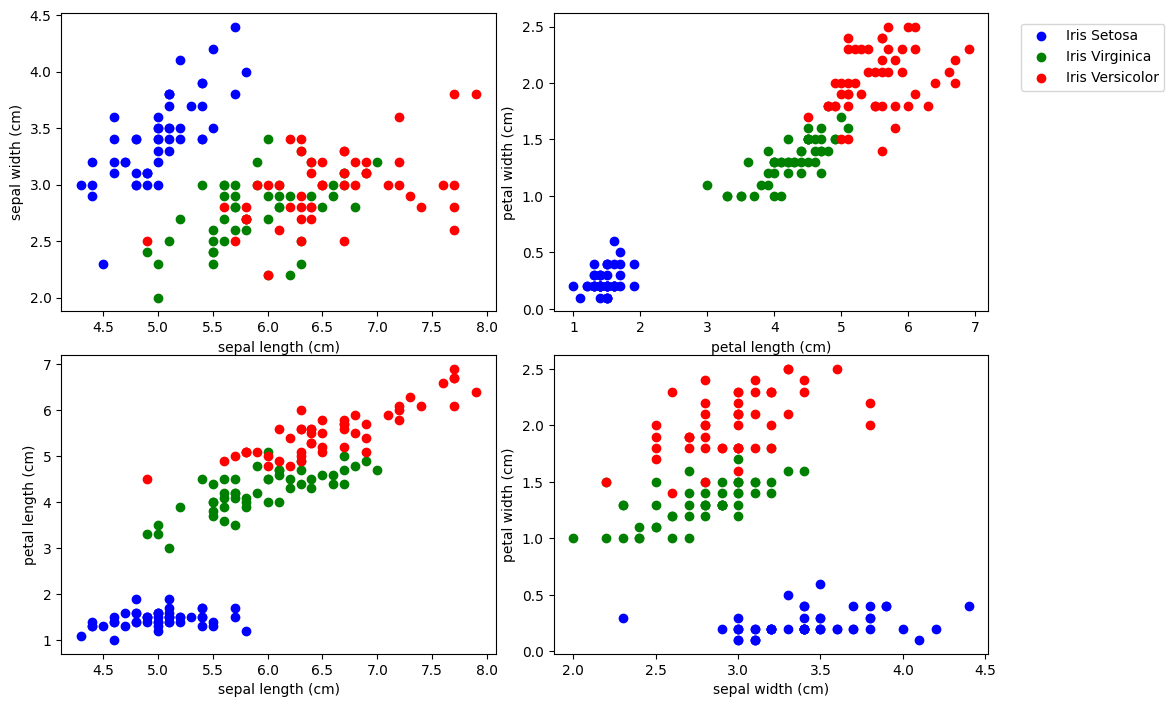

In [15]:
#Understanding of the dataset

#We can see target column, we'll check which ones are the actual classes
class_list = list(df["target"].unique())
print(class_list)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ['b', 'g', 'r']
labels = [
    "Iris Setosa",
    "Iris Virginica",
    "Iris Versicolor"
]

print(list(enumerate(axes.flat)))
print(df.columns)

#Iterate for every axe
for i, ax in enumerate(axes.flat):
  #Iterate each class
  for j in range(3):
    x = df.columns[plots[i][0]]
    y = df.columns[plots[i][1]]

    target_data = df[df['target'] == j]

    ax.scatter(target_data[x], target_data[y], color=colors[j])
    ax.set(
        xlabel=x,
        ylabel=y
    )

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()




### **Dataset Train/Test Split**

#### Option #1: Sklearn

In [16]:
#train test split
from sklearn.model_selection import train_test_split

In [23]:
features = df.drop('target', axis=1).values
label = df['target'].values

x_tr, x_ts, y_tr, y_ts = train_test_split(
    features,
    label,
    test_size=.2,
    random_state=33
)

print(x_tr[:5])
print(y_tr[:5])

[[5.6 2.7 4.2 1.3]
 [6.7 3.1 4.7 1.5]
 [5.6 2.8 4.9 2. ]
 [6.4 3.2 5.3 2.3]
 [6.7 3.1 5.6 2.4]]
[1. 1. 2. 2. 2.]


In [24]:
#Cast to torch tensors
x_tr = torch.tensor(x_tr, dtype=torch.float)
x_ts = torch.tensor(x_ts, dtype=torch.float)

y_tr = torch.tensor(y_tr, dtype=torch.int).reshape(-1, 1)
y_ts = torch.tensor(y_ts, dtype=torch.int).reshape(-1, 1)

#### Option #2: Torch

In [26]:
from torch.utils.data import TensorDataset, DataLoader

In [31]:
features = df.drop('target', axis=1).values
labels = df['target'].values

iris_ds = TensorDataset(
    torch.tensor(features, dtype=float),
    torch.tensor(labels, dtype=int)
)

for i in range(5):
  print(iris_ds[i])

(tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000], dtype=torch.float64), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000], dtype=torch.float64), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000], dtype=torch.float64), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000], dtype=torch.float64), tensor(0))


In [32]:
iris_loader = DataLoader(iris_ds, batch_size=50, shuffle=True)

In [35]:
for idx, itm_batch in enumerate(iris_loader):
  print(idx, itm_batch)

0 [tensor([[6.7000, 2.5000, 5.8000, 1.8000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.1000, 3.5000, 1.4000

# **Classification Model**

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

## Hyperparameter Definition

In [51]:
epochs = 100
seed = 32
lr = 1e-2

torch.manual_seed(seed)

## Data Load

In [44]:
df = pd.read_csv("iris.csv")
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [62]:
x = df.drop("target", axis=1).values
y = df['target'].values


x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=.2, random_state=seed)
x_tr = torch.tensor(x_tr, dtype=torch.float)
x_ts = torch.tensor(x_ts, dtype=torch.float)

y_tr = torch.tensor(y_tr, dtype=torch.long)
y_ts = torch.tensor(y_ts, dtype=torch.long)

## Model definition

In [48]:
class Model(nn.Module):

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    #How many layers?
    #Input -> Hidden -> Hidden -> Output
    #Input (4 features)
    #Output (3 Classes)
    #Hidden (Arbitrary)

    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.out(x)

model = Model()

In [52]:
criterion = nn.CrossEntropyLoss() #Cross entropy because is a multiclass classification model
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [50]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## Main Loop

In [63]:
losses = []

for i in range(epochs):

  y_pred = model.forward(x_tr)
  loss = criterion(y_pred, y_tr)
  losses.append(loss)

  if i%2 == 0:
    print(f"Epoch {i} loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 loss: 1.169895887374878
Epoch 2 loss: 1.096889853477478
Epoch 4 loss: 1.045396327972412
Epoch 6 loss: 1.011089563369751
Epoch 8 loss: 0.9858382940292358
Epoch 10 loss: 0.9578844308853149
Epoch 12 loss: 0.9249759912490845
Epoch 14 loss: 0.8871042728424072
Epoch 16 loss: 0.852028489112854
Epoch 18 loss: 0.8249484896659851
Epoch 20 loss: 0.7988812923431396
Epoch 22 loss: 0.7727233171463013
Epoch 24 loss: 0.7430957555770874
Epoch 26 loss: 0.7103517651557922
Epoch 28 loss: 0.6783477067947388
Epoch 30 loss: 0.634953498840332
Epoch 32 loss: 0.5954111218452454
Epoch 34 loss: 0.5584934949874878
Epoch 36 loss: 0.516156792640686
Epoch 38 loss: 0.47555819153785706
Epoch 40 loss: 0.44043001532554626
Epoch 42 loss: 0.40642049908638
Epoch 44 loss: 0.3788546025753021
Epoch 46 loss: 0.34799909591674805
Epoch 48 loss: 0.32050827145576477
Epoch 50 loss: 0.291716992855072
Epoch 52 loss: 0.26614969968795776
Epoch 54 loss: 0.24144983291625977
Epoch 56 loss: 0.21769283711910248
Epoch 58 loss: 0.19711

Text(0.5, 0, 'Epoch')

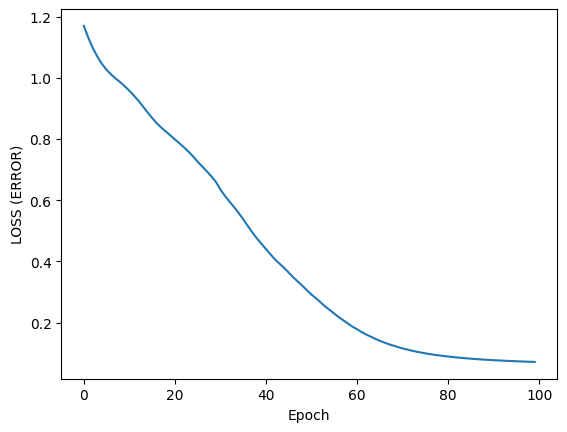

In [65]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel("LOSS (ERROR)")
plt.xlabel("Epoch")

# Model Evaluation


In [68]:
#This tells pytorch to don't apply backpropagation, so this will reduce computational cost and will speed up the result of pytorch
with torch.no_grad():

  y_eval = model.forward(x_ts)
  loss = criterion(y_eval, y_ts)


#If this value is very different than the loss obtained when training the model this is an indicative of an overfitting
print(loss)

tensor(0.0539)


In [70]:
correct = 0
with torch.no_grad():

  for idx, data in enumerate(x_ts):

    y_val = model.forward(data)
    predicted_class = y_val.argmax().item()

    if predicted_class == y_ts[idx]:
      correct += 1


    print(f"Item {idx} classified! Obtained {predicted_class}, Expected {y_ts[idx]}")

print(f"Correct: {correct}/{len(x_ts)}")

Item 0 classified! Obtained 1, Expected 1
Item 1 classified! Obtained 0, Expected 0
Item 2 classified! Obtained 0, Expected 0
Item 3 classified! Obtained 1, Expected 1
Item 4 classified! Obtained 2, Expected 2
Item 5 classified! Obtained 2, Expected 2
Item 6 classified! Obtained 0, Expected 0
Item 7 classified! Obtained 0, Expected 0
Item 8 classified! Obtained 1, Expected 1
Item 9 classified! Obtained 0, Expected 0
Item 10 classified! Obtained 1, Expected 1
Item 11 classified! Obtained 2, Expected 2
Item 12 classified! Obtained 1, Expected 1
Item 13 classified! Obtained 1, Expected 1
Item 14 classified! Obtained 2, Expected 2
Item 15 classified! Obtained 2, Expected 2
Item 16 classified! Obtained 1, Expected 1
Item 17 classified! Obtained 2, Expected 2
Item 18 classified! Obtained 1, Expected 1
Item 19 classified! Obtained 0, Expected 0
Item 20 classified! Obtained 0, Expected 0
Item 21 classified! Obtained 2, Expected 2
Item 22 classified! Obtained 2, Expected 2
Item 23 classified! O

## Save and load model

In [75]:
torch.save(model.state_dict(), 'iris_model.pt')

In [74]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)